# **Indian Premier League (IPL)**

## **Task #5** 
Perform "Exploratory Data Analysis"Indian Premier League (IPL)"

# **The Goal**

- find out the sucessful team,plauers and contributing win or loss of a team

### **The Author** :- **Mina Adel Markos**



# **Context**
Now that this year's IPL is over, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset. It contains the match descriptions, results, winners, player of the matches, ball by ball dataset and much more. So, stop thinking and start analyzing .

# **Content**
This dataset consists of two seperate CSV files : matches and deliveries. These files contain the information of each match summary and ball by ball details, respectively.

# **Acknowledgements**
Data Source : Cricsheet

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
#importing required libraries
import matplotlib
%matplotlib inline
pio.templates.default = 'plotly_white'

#setting the parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Importing Dataset**

In [2]:
df_teams = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

df_del = pd.read_csv('IPL Matches 2008-2020.csv')


In [3]:
df_teams.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df_del.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# **Data Cleaning**


In [5]:
#number of rows and columns
df_teams.shape

(193468, 18)

In [6]:
#getting information about the data
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [7]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
df_teams.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [9]:
df_del.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
df_del['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [11]:
df_del['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [12]:
#fill missing values
df_del.replace('Bangalore','Bengaluru', inplace = True)
df_del['city'].fillna(df_del['venue'], inplace = True)
df_del['winner'].fillna(df_del['result'], inplace = True)
df_del['player_of_match'].fillna(df_del['result'], inplace = True)
df_del['method'].fillna('regular', inplace=True)


In [13]:
df_del.isnull().sum()

id                  0
city                0
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
method              0
umpire1             0
umpire2             0
dtype: int64

In [14]:
#filling the missing values for dismissal_kind and player_dismissed
df_teams['dismissal_kind'].fillna('NA',inplace=True)
df_teams['player_dismissed'].fillna('NA',inplace=True)
df_teams['fielder'].fillna('NA', inplace=True)
df_teams['extras_type'].fillna('NA', inplace=True)

In [15]:
df_teams.isnull().sum()

id                    0
inning                0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
batsman_runs          0
extra_runs            0
total_runs            0
non_boundary          0
is_wicket             0
dismissal_kind        0
player_dismissed      0
fielder               0
extras_type           0
batting_team          0
bowling_team        191
dtype: int64

In [16]:
#merging the both datasets over id
df_com = df_teams.merge(df_del, on="id")
df_com.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen


In [17]:
df_com.isnull().sum()

id                     0
inning                 0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
batsman_runs           0
extra_runs             0
total_runs             0
non_boundary           0
is_wicket              0
dismissal_kind         0
player_dismissed       0
fielder                0
extras_type            0
batting_team           0
bowling_team         191
city                   0
date                   0
player_of_match      372
venue                  0
neutral_venue          0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
winner               372
result               372
result_margin       3597
eliminator           372
method                 0
umpire1                0
umpire2                0
dtype: int64

In [18]:
df_del

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,regular,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,regular,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,regular,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,regular,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,regular,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,regular,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,regular,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,regular,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,regular,PR Reiffel,S Ravi


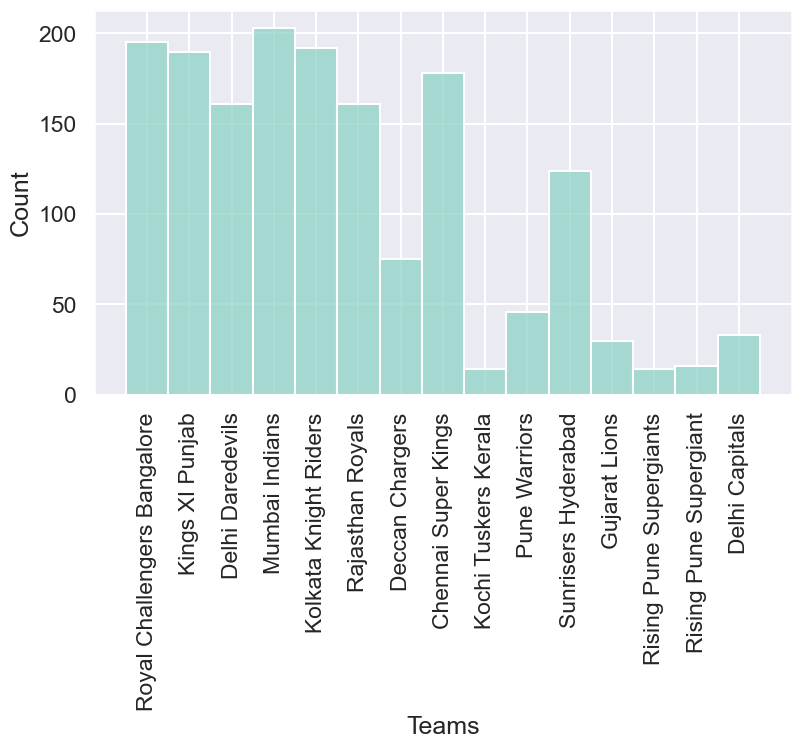

In [19]:
#matches played by each team
played=list(df_del['team1'])+list(df_del['team2'])
sns.histplot(played)
plt.xticks(rotation=90)
plt.xlabel('Teams');

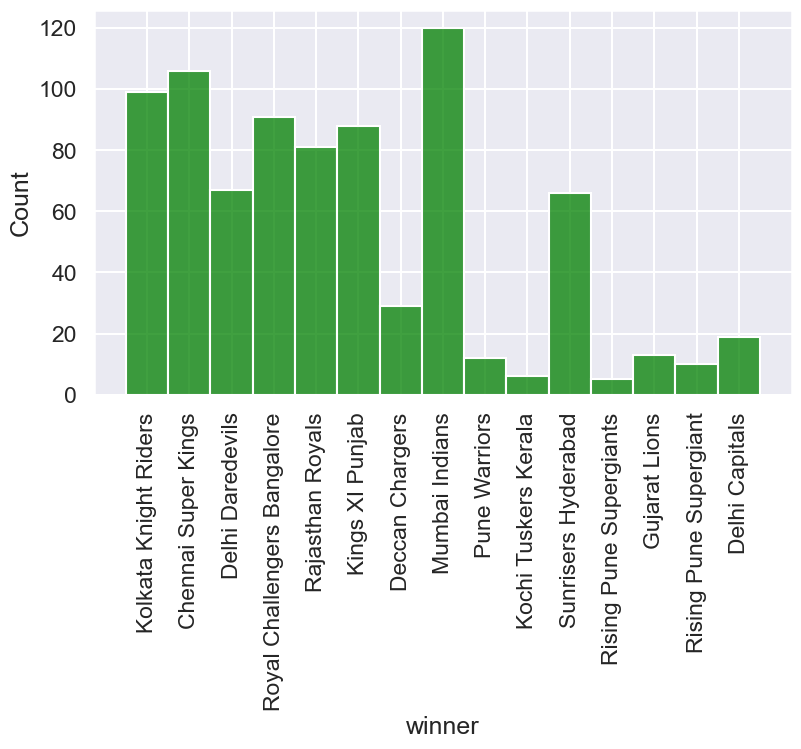

In [20]:
#matches won by each team
sns.histplot(df_del['winner'], color='green')
plt.xticks(rotation=90);

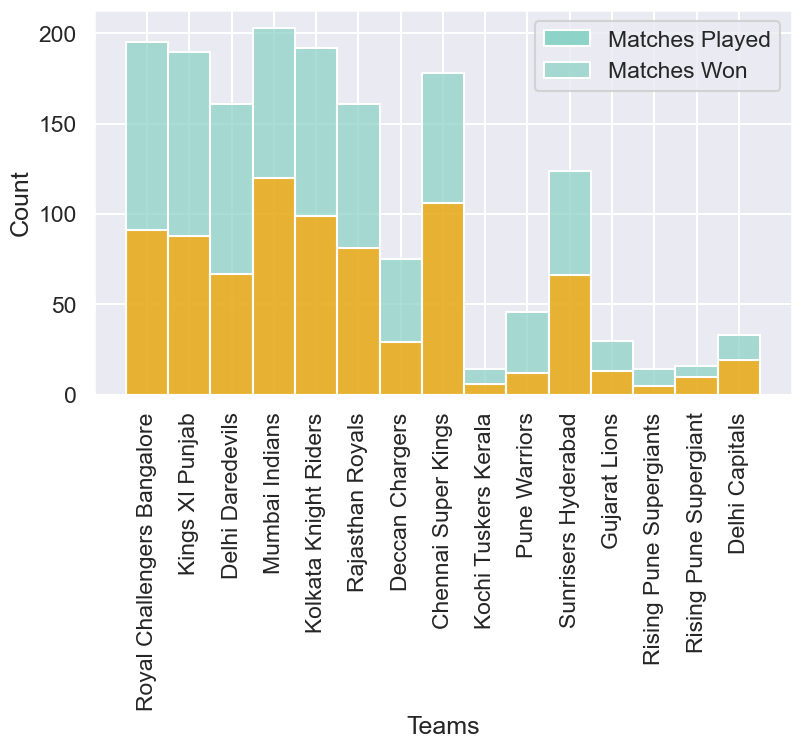

In [21]:
#comparing the matches played and matches won by each team
sns.histplot(played)
sns.histplot(df_del['winner'], color='orange')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams');

In [22]:
df_teams.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [23]:
out=df_teams["dismissal_kind"].value_counts()
extat=df_teams["extras_type"].value_counts()
extar=df_teams["extra_runs"].value_counts()[1:]
over=df_teams[df_teams["is_wicket"]==1]["over"].value_counts()

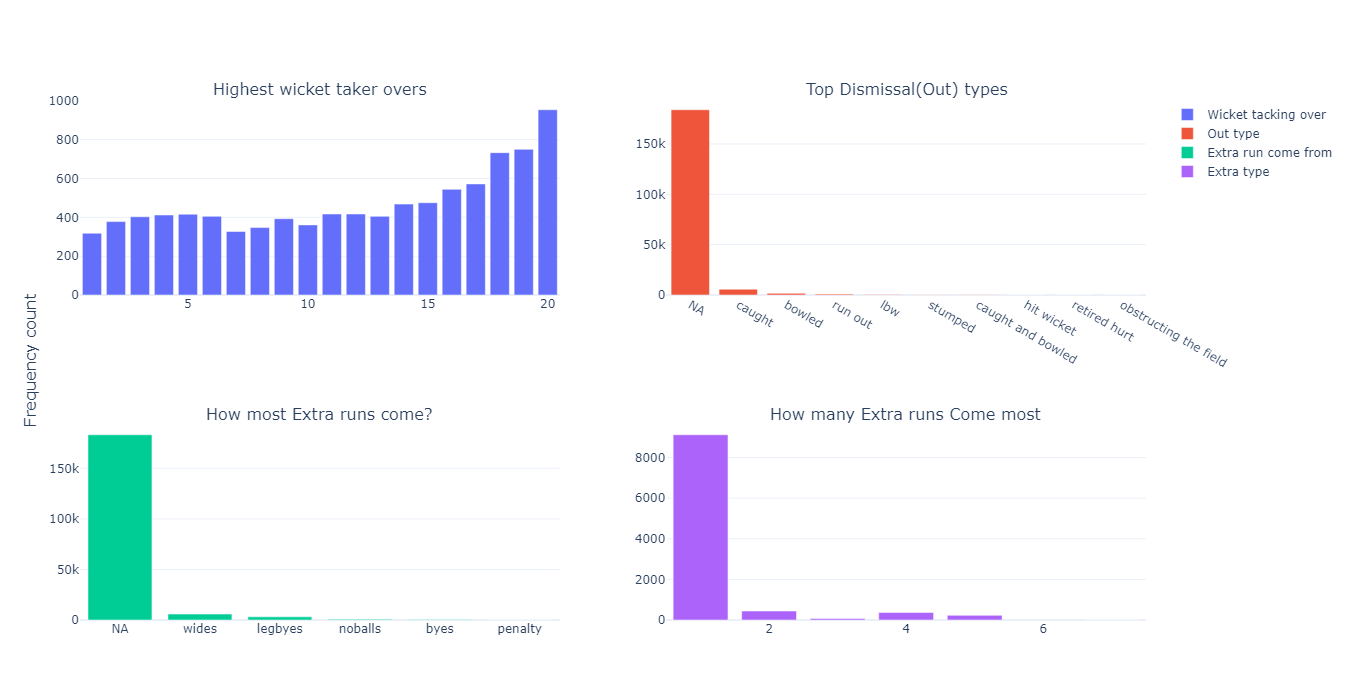

In [31]:
fig = make_subplots(cols=2,rows=2,
    vertical_spacing = 0.25, horizontal_spacing=.1,subplot_titles=["Highest wicket taker overs","Top Dismissal(Out) types","How most Extra runs come?","How many Extra runs Come most"],y_title="Frequency count"
    )
fig.add_trace(go.Bar(x=over.index+1,y=over.values,name="Wicket tacking over"),row=1,col=1)
fig.add_trace(go.Bar(x=out.index,y=out.values,name="Out type"),row=1,col=2)
fig.add_trace(go.Bar(x=extat.index,y=extat.values,name="Extra run come from"),row=2,col=1)
fig.add_trace(go.Bar(y=extar.values,x=extar.index,name="Extra type"),row=2,col=2)
fig.update_layout(height=700,width=1350)
fig.show('png')

In [25]:
sixers=df_teams[df_teams["batsman_runs"] == 6]['batsman'].value_counts().head(10)
fours=df_teams[df_teams["batsman_runs"] == 4]['batsman'].value_counts().head(10)

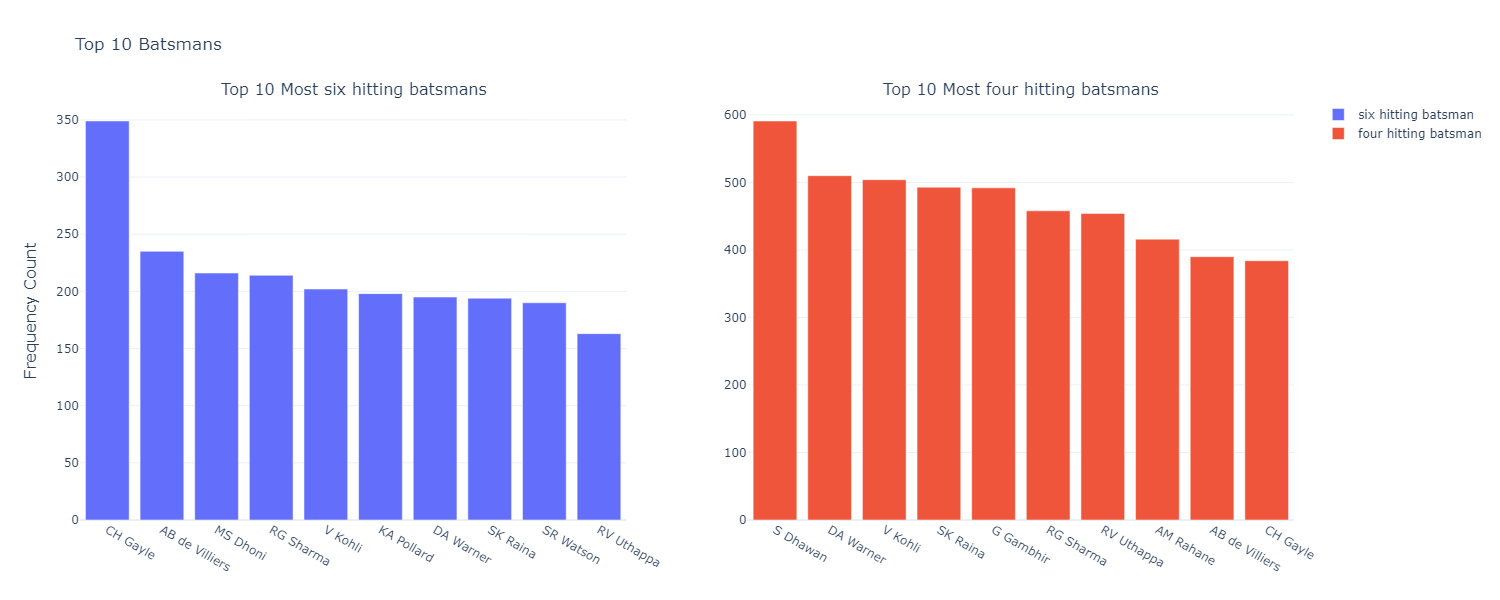

In [37]:
fig= make_subplots(rows=1 ,cols=2,specs=[[{"type": "bar"}, {"type": "bar"}]],subplot_titles=["Top 10 Most six hitting batsmans","Top 10 Most four hitting batsmans"],y_title="Frequency Count")

fig.add_trace(go.Bar(x=sixers.index ,y=sixers.values,name="six hitting batsman"),row=1 ,col=1)
fig.add_trace(go.Bar(x=fours.index ,y=fours.values,name="four hitting batsman"),row=1 ,col=2)
fig.update_layout(title="Top 10 Batsmans",height=350)
fig.show('png',width= 1500,height=600)

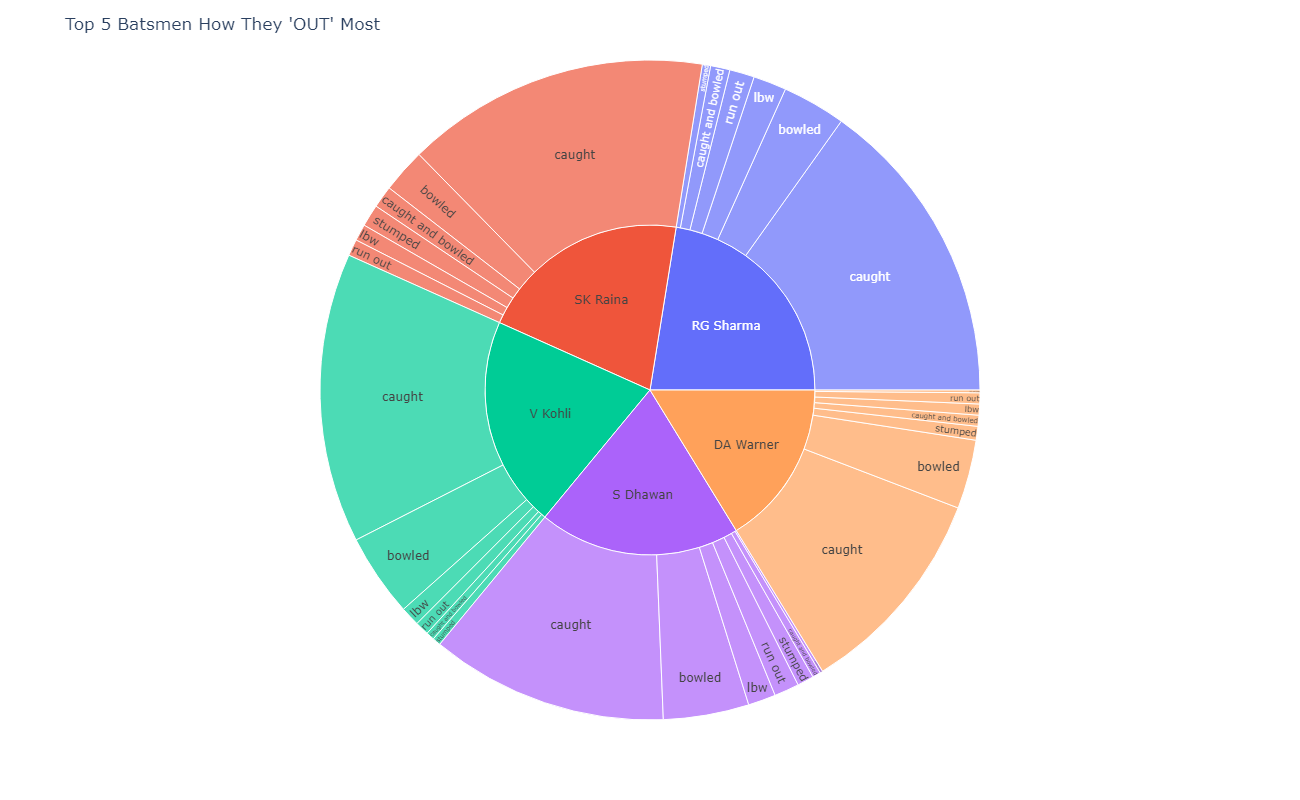

In [41]:
topbats=df_teams.groupby("batsman").sum()["batsman_runs"].sort_values(ascending=False).head().index
df=df_teams.loc[(df_teams['batsman'].isin(topbats)) & (df_teams["batsman"]==df_teams['player_dismissed'])]
fig=px.sunburst(df, path=['batsman', 'dismissal_kind'], values='is_wicket')
fig.update_layout(height=700,title="Top 5 Batsmen How They 'OUT' Most")
fig.show('png',width= 1300,height=800)

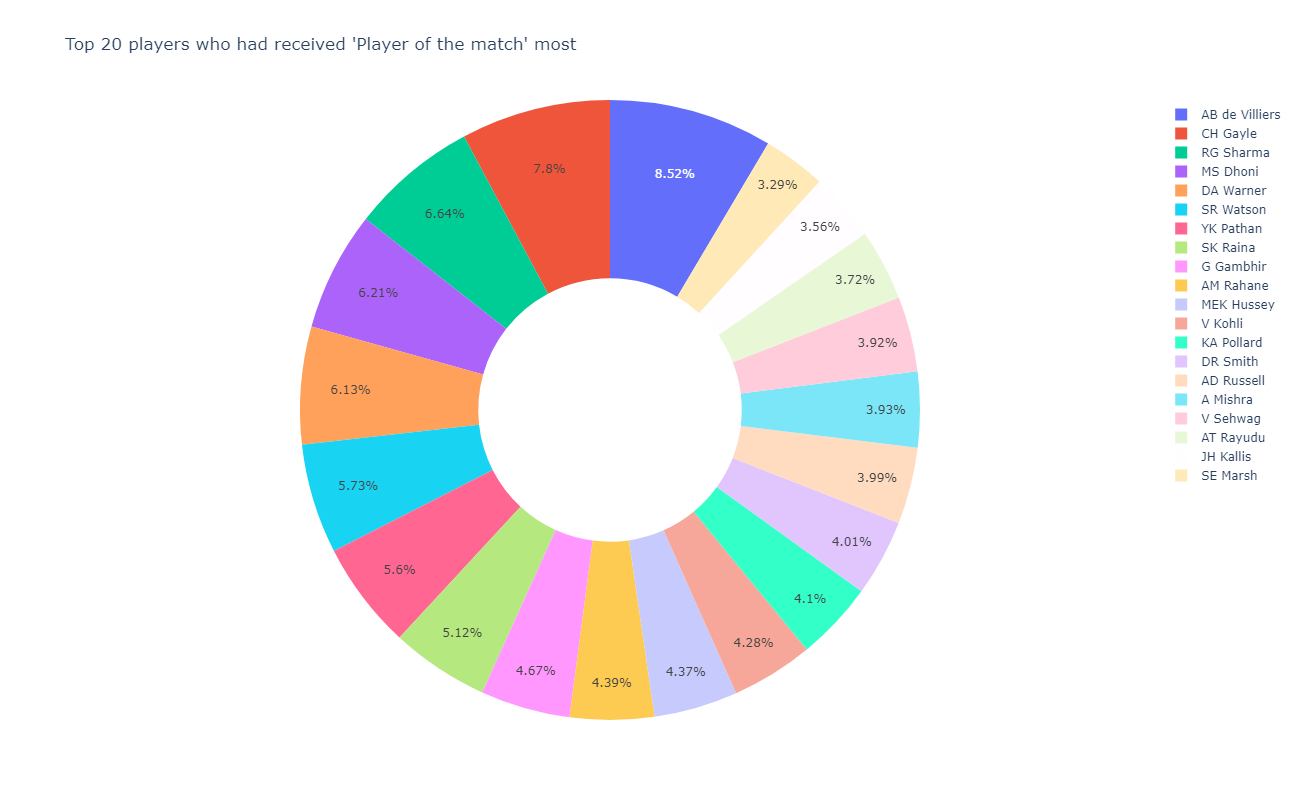

In [42]:
player_of_match=df_com["player_of_match"].value_counts().head(20)
fig=make_subplots(cols=1 ,rows=1)
fig.add_trace(go.Pie(values=player_of_match.values,labels=player_of_match.index))
fig.update_traces(hole=.425)
fig.update_layout(title="Top 20 players who had received 'Player of the match' most")
fig.show('png',width= 1300,height=800)

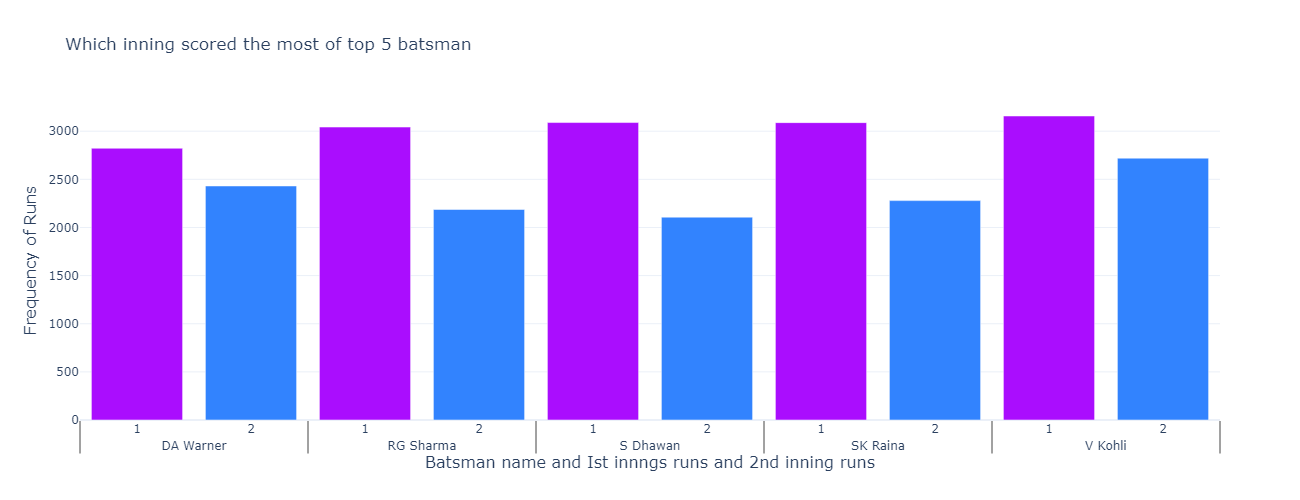

In [43]:
topbats=df_com.groupby("batsman").sum()["batsman_runs"].sort_values(ascending=False).head(5)
top5batsman=df_com.loc[df_com["batsman"].isin(topbats.index)]
top5batsman=top5batsman.groupby(["batsman",'inning']).sum()
top5batsman = top5batsman.reset_index()
fig =make_subplots(cols=1 ,rows=1,y_title="Frequency of Runs",x_title="Batsman name and Ist innngs runs and 2nd inning runs")
fig.add_trace(go.Bar(x=[top5batsman["batsman"],top5batsman['inning']],y=top5batsman['batsman_runs'],marker_color =['#AA0DFE','#3283FE','#AA0DFE','#3283FE','#AA0DFE','#3283FE','#AA0DFE','#3283FE','#AA0DFE','#3283FE']))
fig.update_layout(title="Which inning scored the most of top 5 batsman ")
fig.show('png',width= 1300,height=500)

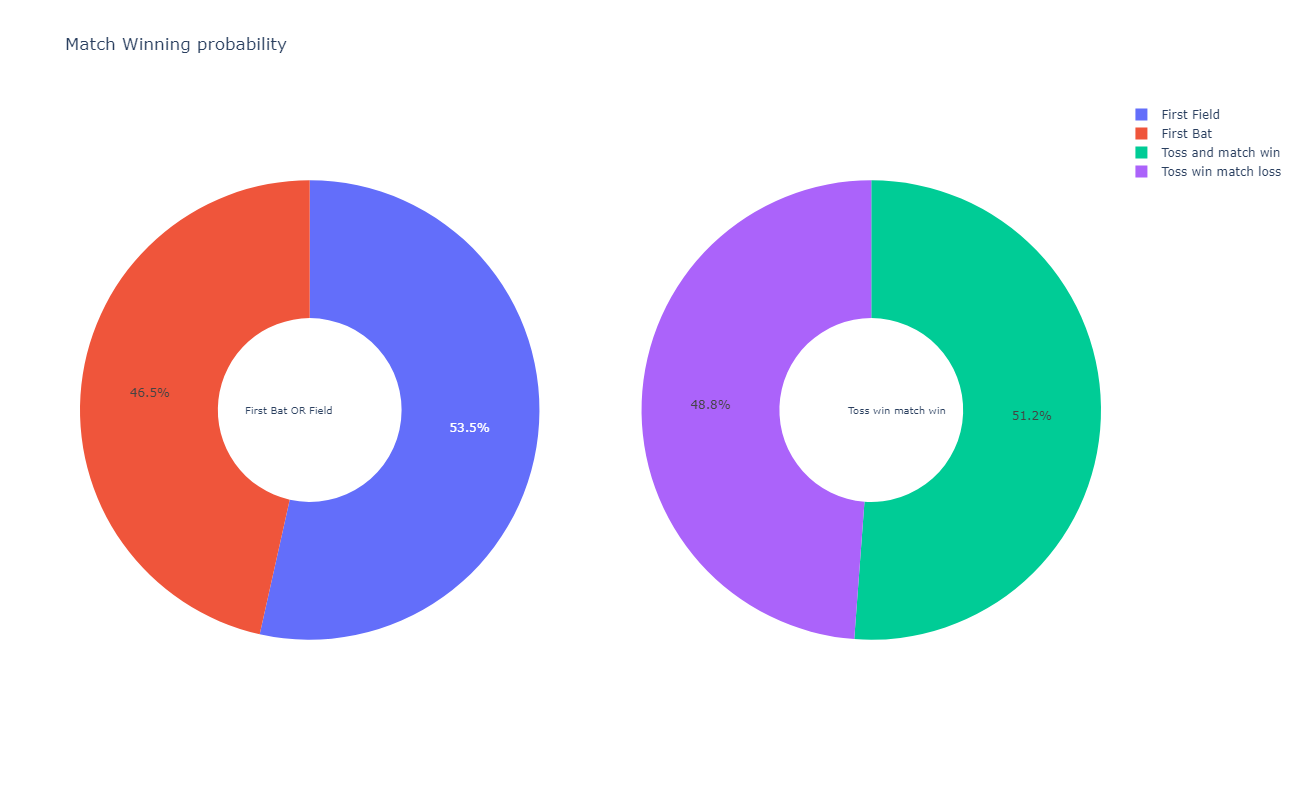

In [44]:
f_bat_last=df_com["result"].value_counts()[:-1]
win=df_com[df_com['toss_winner']== df_com['winner']]['winner'].value_counts().sum()
loss=df_com[df_com['toss_winner']!= df_com['winner']]['winner'].value_counts().sum()
fig=make_subplots(cols=2,rows=1,specs=[[{"type":"pie"},
{"type":"pie"}]])
fig.add_trace(go.Pie(values=f_bat_last.values,labels=["First Field","First Bat"],name="W.P. First Bat OR field"),row=1,col=1)
fig.add_trace(go.Pie(values=[win,loss],labels=["Toss and match win","Toss win match loss"],name="W.P. Toss Win vs Match Win"),row=1,col=2)
fig.update_traces(hole=.4,hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Match Winning probability",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='First Bat OR Field', x=0.16, y=0.5, font_size=10, showarrow=False),
                 dict(text='Toss win match win', x=0.85, y=0.5, font_size=10, showarrow=False)])

fig.show('png',width= 1300,height=800)

# **Thank You**